Accuracy: 0.9035087719298246
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88        42
           1       0.96      0.89      0.92        72

    accuracy                           0.90       114
   macro avg       0.89      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



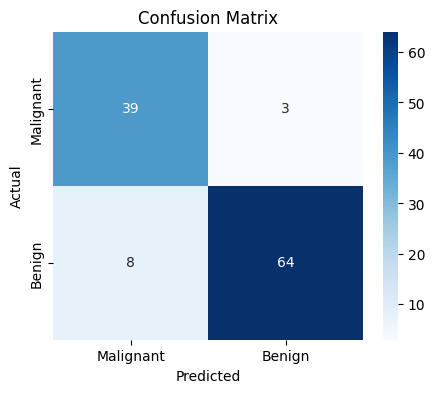


--- Breast Cancer Prediction ---

Prediction: Benign (Not Cancerous)


In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#-----------------------DATA------------------------#
# 1. LOAD DATASET
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

# Keep only 5 important features
df_small = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'target']]

# 2. Split dataset
x = df_small.drop(columns=["target"])
y = df_small["target"]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

#-----------------------MODEL CREATION------------------------#

# 3. Train logistic regression
model = LogisticRegression(max_iter=1000)  # Increased iterations
model.fit(x_train, y_train)

# 4. Evaluate model
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# ---------- Evaluation Visualization --------- #

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Malignant", "Benign"], 
            yticklabels=["Malignant", "Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#------------------------------------------------PREDICTION---------------------------------#

# 5. User Input Prediction
print("\n--- Breast Cancer Prediction ---")

mean_radius = float(input("Enter mean radius (e.g. 14.5): "))
mean_texture = float(input("Enter mean texture (e.g. 20.0): "))
mean_perimeter = float(input("Enter mean perimeter (e.g. 100.0): "))
mean_area = float(input("Enter mean area (e.g. 900.0): "))
mean_smoothness = float(input("Enter mean smoothness (e.g. 0.1): "))

# Create DataFrame for user input
user_data = {
    "mean radius": mean_radius,
    "mean texture": mean_texture,
    "mean perimeter": mean_perimeter,
    "mean area": mean_area,
    "mean smoothness": mean_smoothness
}
user_df = pd.DataFrame([user_data])

# Predict
prediction = model.predict(user_df)[0]

if prediction == 1:
    print("\nPrediction: Benign (Not Cancerous)")
else:
    print("\nPrediction: Malignant (Cancerous)")
